## Data Analysis Exercise

#### Overview
| Column Name          | Type   | Description                                                                                     |
|-----------------------|--------|-------------------------------------------------------------------------------------------------|
| number_of_strikes     | int64  | The total count of lightning strikes in that geographic tile on a given date                    |
| center_point_geom     | str    | String of characters representing the geographic center point of the strikes based on the latitude and longitude given |
| date    | str    | The recorded date (format: YYYY/MM/DD) |

In this notebook, we will use pandas to examine 2018 lightning strike data collected by the National Oceanic and Atmospheric Administration (NOAA). Then, we will calculate the total number of strikes for each month and plot this information on a bar graph.



### Import packages and libraries

Before getting started, we will need to import all the required libraries and extensions.

In [1]:
import pandas as pd # 
import numpy as np #
import seaborn as sns # 
import matplotlib.pyplot as plt

In [2]:
# Read in the 2018 lightning strike dataset.
df = pd.read_csv('/Users/macbook/Documents/5. Data Analysis Exercise .csv')

In [4]:
df.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


In [7]:
2

2

In [9]:
a = 2
a

2

In [11]:
a

2

In [13]:
a

2

In [15]:
'2018-01-03'.split('-')

['2018', '01', '03']

In [17]:
 df['date'].str.split('-').str[1]

0          01
1          01
2          01
3          01
4          01
           ..
3401007    12
3401008    12
3401009    12
3401010    12
3401011    12
Name: date, Length: 3401012, dtype: object

In [18]:
df['month'] = df['date'].str.split('-').str[1]
# df['month']

In [19]:
# df[['month']]

In [20]:
df_finall = df.groupby(df['month'])['number_of_strikes'].sum()

In [21]:
df['month'].replace({'01':'Jan',
                    '02':'Feb'})

0          Jan
1          Jan
2          Jan
3          Jan
4          Jan
          ... 
3401007     12
3401008     12
3401009     12
3401010     12
3401011     12
Name: month, Length: 3401012, dtype: object

In [22]:
df.head()

,date,number_of_strikes,center_point_geom,month
0,2018-01-03,194,POINT(-75 27),01
1,2018-01-03,41,POINT(-78.4 29),01
2,2018-01-03,33,POINT(-73.9 27),01
3,2018-01-03,38,POINT(-73.8 27),01
4,2018-01-03,92,POINT(-79 28),01


In [23]:
df_finall

month
01      860045
02     2071315
03      854168
04     1524339
05     4166726
06     6445083
07     8320400
08    15525255
09     3018336
10     1093962
11      409263
12      312097
Name: number_of_strikes, dtype: int64

In [24]:
df_finall.index

Index(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'], dtype='object', name='month')

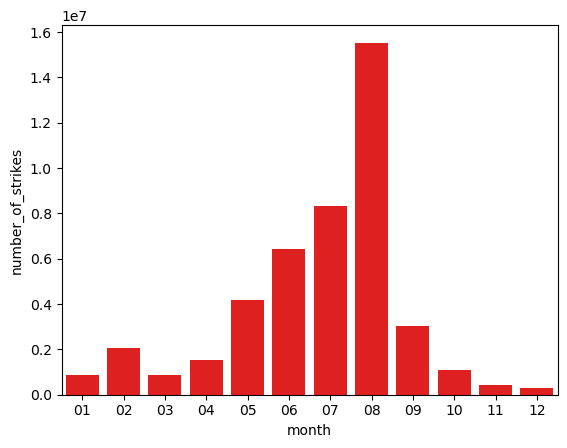

In [25]:
sns.barplot(x = df_finall.index, y = df_finall, color = 'r');

In [27]:
df.dtypes

date                 object
number_of_strikes     int64
center_point_geom    object
month                object
dtype: object

In [29]:
df['date'] =pd.to_datetime(df['date'])

In [30]:
df.head()

,date,number_of_strikes,center_point_geom,month
0,2018-01-03,194,POINT(-75 27),01
1,2018-01-03,41,POINT(-78.4 29),01
2,2018-01-03,33,POINT(-73.9 27),01
3,2018-01-03,38,POINT(-73.8 27),01
4,2018-01-03,92,POINT(-79 28),01


In [31]:
df.dtypes

date                 datetime64[ns]
number_of_strikes             int64
center_point_geom            object
month                        object
dtype: object

In [32]:
df['month_str']= df['date'].dt.strftime('%b')

In [42]:
df.groupby(df['month_str'])['number_of_strikes'].sum()

month_str
Apr     1524339
Aug    15525255
Dec      312097
Feb     2071315
Jan      860045
Jul     8320400
Jun     6445083
Mar      854168
May     4166726
Nov      409263
Oct     1093962
Sep     3018336
Name: number_of_strikes, dtype: int64

In [46]:
df.groupby(['month',])['number_of_strikes'].sum()

month
01      860045
02     2071315
03      854168
04     1524339
05     4166726
06     6445083
07     8320400
08    15525255
09     3018336
10     1093962
11      409263
12      312097
Name: number_of_strikes, dtype: int64

## 

In [48]:
df_2 = df.groupby(['month', 'month_str'])['number_of_strikes'].sum().reset_index()

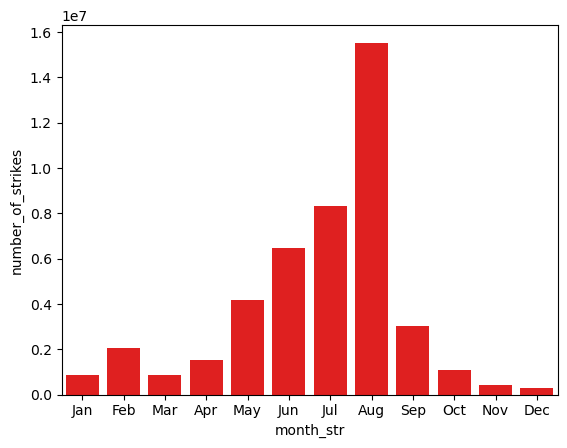

In [49]:
sns.barplot(x =df_2['month_str']  , y = df_2['number_of_strikes'], color = 'r');

In [50]:
df_2.index

RangeIndex(start=0, stop=12, step=1)

In [51]:
df_2['number_of_strikes']

0       860045
1      2071315
2       854168
3      1524339
4      4166726
5      6445083
6      8320400
7     15525255
8      3018336
9      1093962
10      409263
11      312097
Name: number_of_strikes, dtype: int64

In [52]:
df_2['month_str']

0     Jan
1     Feb
2     Mar
3     Apr
4     May
5     Jun
6     Jul
7     Aug
8     Sep
9     Oct
10    Nov
11    Dec
Name: month_str, dtype: object

In [53]:
df_2

,month,month_str,number_of_strikes
0,01,Jan,860045
1,02,Feb,2071315
2,03,Mar,854168
3,04,Apr,1524339
4,05,May,4166726
5,06,Jun,6445083
6,07,Jul,8320400
7,08,Aug,15525255
8,09,Sep,3018336
9,10,Oct,1093962


In [57]:
df['date'].dt.strftime('%Y')

0          2018
1          2018
2          2018
3          2018
4          2018
           ... 
3401007    2018
3401008    2018
3401009    2018
3401010    2018
3401011    2018
Name: date, Length: 3401012, dtype: object

In [64]:
df['month']

0          01
1          01
2          01
3          01
4          01
           ..
3401007    12
3401008    12
3401009    12
3401010    12
3401011    12
Name: month, Length: 3401012, dtype: object

In [65]:
df.shape

(3401012, 5)

In [79]:
# Inspect the first 10 rows.
# df.head(10)

### If we complete the exercise successfully, we will generate this bar graph to present to stakeholders.

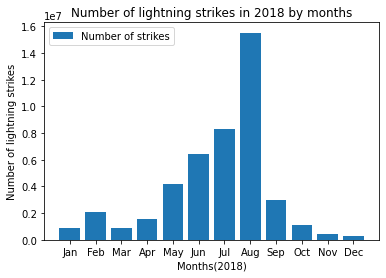

### Check the chart below to see how to generate it using Python:

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/ManonYa09/Fundametal_Data_Science_G8/main/Dataset/2.%20Bank%20Customer%20Churn%20Prediction.csv')

In [7]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
df['churn'].replace({0:'No', 1:'Yes'}, inplace=True)

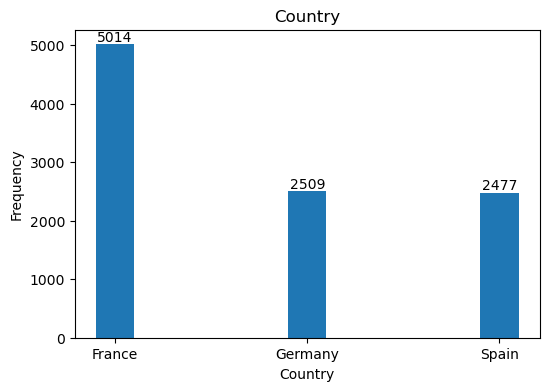

In [53]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(df['country'].value_counts().index, height=df['country'].value_counts(), width = 0.2)
ax.set_title('Country')
ax.set_ylabel('Frequency')
ax.set_xlabel('Country')
ax.bar_label(ax.containers[0])
plt.show()

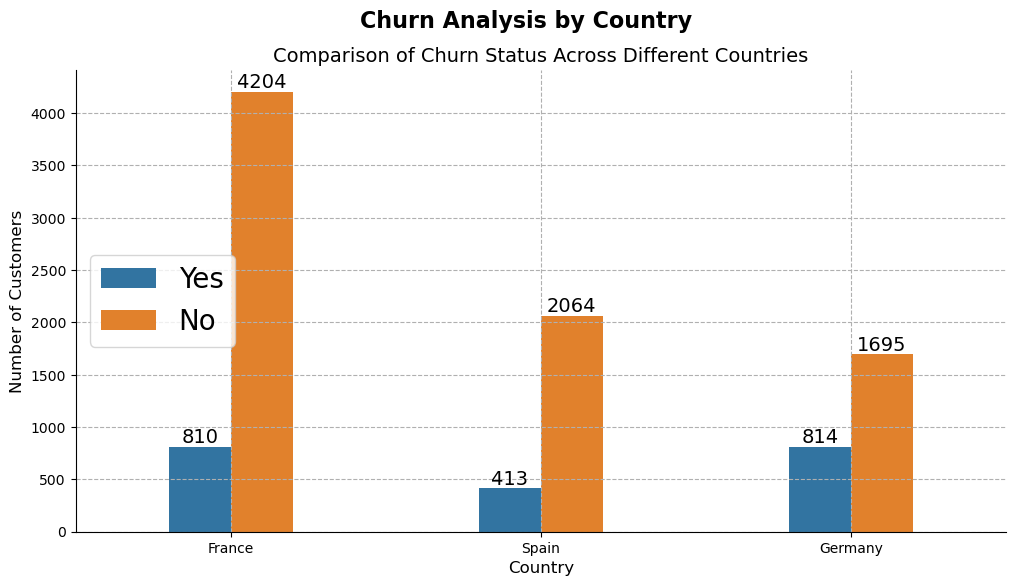

In [66]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x = df['country'], width=0.4, hue = df['churn'])
fig.suptitle('Churn Analysis by Country', fontsize=16, fontweight = 'bold')
ax.set_title('Comparison of Churn Status Across Different Countries', fontsize=14)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)
sns.despine()
ax.grid(ls = '--')
ax.legend(loc = 6,fontsize = 20 )

for i in ax.containers:
    ax.bar_label(i, fontsize = 14)

plt.show()
# plt.savefig('Data.jpg', dpi = 1500)